# LINEAR REGRESSION

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#%matplotlib inline

In [2]:
path = 'datapath/to/ID/1000_Companies.csv'
companies = pd.read_csv(path)
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
companies.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
companies.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

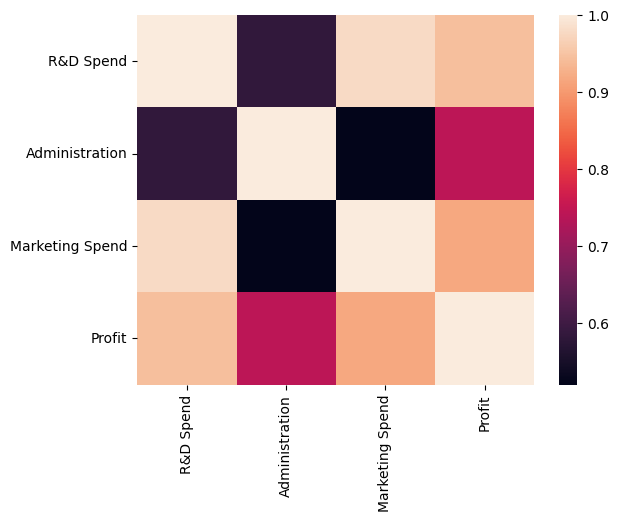

In [8]:
sns.heatmap(companies.corr(numeric_only=True))

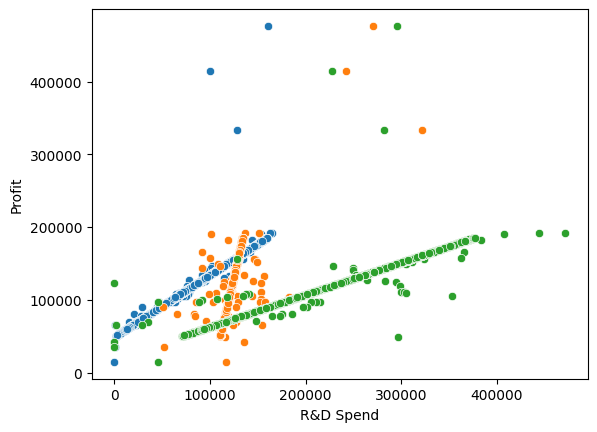

In [9]:
sns.scatterplot(data=companies, x='R&D Spend', y='Profit')
sns.scatterplot(data=companies, x='Administration', y='Profit')
sns.scatterplot(data=companies, x='Marketing Spend', y='Profit')

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187362,  94894.67836972, 175680.86725608,
        83411.7304209 , 110571.90200075, 132145.2293644 ,  91473.37719687,
       164597.05380605,  53222.82667403,  66950.19050991, 150566.43987003,
       126915.20858596,  59337.85971052, 177513.9105306 ,  75316.28143052,
       118248.14406603, 164574.406999  , 170937.28981069, 182069.11645082,
       118845.0325269 ,  85669.9511223 , 180992.59396141,  84145.08220146,
       105005.83769214, 101233.56772747,  53831.07669094,  56881.41475226,
        68896.39346906, 210040.00765881, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996745, 108857.91214127,
       186014.72531986, 171442.64130745, 174644.26529203, 117671.49128195,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176915,
       116513.89532178,  58632.48986822, 158416.46827608,  78541.48521611,
       159727.66671742, 131137.87699643, 184880.70924514, 174609.08266878,
        93745.6635206 ,  

In [14]:
print(regressor.coef_)

[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [15]:
print(regressor.intercept_)

-51561.46494775577


In [22]:
from sklearn.metrics import r2_score
100*r2_score(y_test, y_pred)

91.12695892268799